In [1]:
import numpy as np
import awkward as ak
import hist
import warnings
import pickle
from coffea.ml_tools.torch_wrapper import torch_wrapper
import matplotlib.pyplot as plt
import hist
from sklearn.metrics import roc_curve, auc
import math
import os
import uproot
import json
import math

In [2]:
with open('../../jsons/subregion_event_totals.json', 'r') as f:
    totals = json.load(f)
with open('../../jsons/my_xsecs.json', 'r') as f:
    xsecs = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '../../jsons/subregion_event_totals.json'

In [243]:
xsecs['qcd']['qcd_300to470'] = 6833*(0.25)

In [244]:
xsecs['qcd']['qcd_300to470']

1708.25

In [245]:
totals_x = {}
for i in totals:
    if type(totals[i]) == dict:
        totals_x[i] = {}
        for j in totals[i]:
            totals_x[i][f'{i}_{j}'] = totals[i][j]
    else:
        totals_x[i] = totals[i]

In [246]:
hgg = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/hgg.parquet')
hbb = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/hbb.parquet')
singletop = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/singletop.parquet')
ww = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/ww.parquet')
wz = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/wz.parquet')
zz = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/zz.parquet')

In [267]:
qcd = {}
#qcd['qcd_300to470'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/qcd_300to470.parquet')
qcd['qcd_470to600'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/qcd_470to600.parquet')
qcd['qcd_600to800'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/qcd_600to800.parquet')
qcd['qcd_800to1000'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/qcd_800to1000.parquet')
qcd['qcd_1000to1400'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/qcd_1000to1400.parquet')
qcd['qcd_1400to1800'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/qcd_1400to1800.parquet')
qcd['qcd_1800to2400'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/qcd_1800to2400.parquet')
qcd['qcd_2400to3200'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/qcd_2400to3200.parquet')
qcd['qcd_3200toInf'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/qcd_3200toInf.parquet')

In [268]:
wqq = {}
#wqq['wqq_200to400'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/wqq_200to400.parquet')
wqq['wqq_400to600'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/wqq_400to600.parquet')
wqq['wqq_600to800'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/wqq_600to800.parquet')
wqq['wqq_800toInf'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/wqq_800toInf.parquet')

In [269]:
zqq = {}
#zqq['zqq_200to400'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/zqq_200to400.parquet')
zqq['zqq_400to600'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/zqq_400to600.parquet')
zqq['zqq_600to800'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/zqq_600to800.parquet')
zqq['zqq_800toInf'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/zqq_800toInf.parquet')

In [270]:
ttboosted = {}
ttboosted['ttboosted_700to1000'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/ttboosted_700to1000.parquet')
ttboosted['ttboosted_1000toInf'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/ttboosted_1000toInf.parquet')

In [271]:
mc = {}
mc['hgg'] = hgg
mc['hbb'] = hbb
mc['singletop'] = singletop
mc['ww'] = ww
mc['wz'] = wz
mc['zz'] = zz
mc['qcd'] = qcd
mc['wqq'] = wqq
mc['zqq'] = zqq
mc['ttboosted'] = ttboosted

In [272]:
for i in mc:
    if type(mc[i]) == dict:
        for j in mc[i]:
            mc[i][j] = mc[i][j][(ak.any(mc[i][j].pt > 450, axis=1))]
    else:
        mc[i] = mc[i][ak.any(mc[i].pt > 450, axis=1)]

for i in mc:
    if type(mc[i]) == dict:
        for j in mc[i]:
            mc[i][j] = mc[i][j][(ak.any(mc[i][j].pt < 600, axis=1))]
    else:
        mc[i] = mc[i][ak.any(mc[i].pt < 600, axis=1)]

In [273]:
data = {}
data['B'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/SingleMuon_B.parquet')
data['C'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/SingleMuon_C.parquet')
data['D'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/SingleMuon_D.parquet')
data['E'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/SingleMuon_E.parquet')
data['F'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/SingleMuon_F.parquet')

for i in data:
    if type(data[i]) == dict:
        for j in data[i]:
            data[i][j] = data[i][j][(ak.any(data[i][j].pt > 450, axis=1))]
    else:
        data[i] = data[i][ak.any(data[i].pt > 450, axis=1)]

for i in data:
    if type(data[i]) == dict:
        for j in data[i]:
            data[i][j] = data[i][j][(ak.any(data[i][j].pt < 600, axis=1))]
    else:
        data[i] = data[i][ak.any(data[i].pt < 600, axis=1)]

data_arr = ak.concatenate([data['B'], data['C'], data['D'], data['E'], data['F']])

In [274]:
data_hist = hist.Hist.new.Reg(40, 40, 200, name='msd', label='Data MSD').Weight()
data_hist.fill(msd=ak.flatten(data_arr.msoftdrop));

In [275]:
def msd_hist(dataset):
    make_hist = hist.Hist.new.Reg(40, 40, 200, name='msd', label='MC MSD').Weight()
    make_hist.fill(msd=ak.flatten(dataset.msoftdrop))
    return make_hist

In [276]:
hists = {}
for i in mc:
    if type(mc[i]) == dict:
        hists[i] = {}
        for j in mc[i]:
            hists[i][j] = msd_hist(mc[i][j])
    else:
        hists[i] = msd_hist(mc[i])

In [277]:
IL = 44.99

In [278]:
scaleHgg = ((IL*(xsecs['hgg']*1000)*0.0817)/(totals['hgg']))
hists['hgg'].view(flow=True)[:] *= scaleHgg

scaleHbb = ((IL*(xsecs['hbb']*1000)*0.581)/(totals['hbb']))
hists['hbb'].view(flow=True)[:] *= scaleHbb

In [279]:
for i in mc:
    if (i == 'hgg') or (i == 'hbb'):
        continue
    else:
        if type(mc[i]) == dict:
            for j in mc[i]:
                scale = ((IL*(xsecs[i][j]*1000))/(totals_x[i][j]))
                hists[i][j].view(flow=True)[:] *= scale
        else:
            scale = ((IL*(xsecs[i]*1000))/(totals_x[i]))
            hists[i].view(flow=True)[:] *= scale

In [280]:
qcd_hist = sum(hists['qcd'][i] for i in hists['qcd'])

In [281]:
wqq_hist = sum(hists['wqq'][i] for i in hists['wqq'])

In [282]:
zqq_hist = sum(hists['zqq'][i] for i in hists['zqq'])

In [283]:
ttboosted_hist = sum(hists['ttboosted'][i] for i in hists['ttboosted'])

In [284]:
single_hists = {}
single_hists['qcd'] = qcd_hist
single_hists['wqq'] = wqq_hist
single_hists['zqq'] = zqq_hist
single_hists['ttboosted'] = ttboosted_hist
single_hists['hgg'] = hists['hgg']
single_hists['hbb'] = hists['hbb']
single_hists['ww'] = hists['ww']
single_hists['zz'] = hists['zz']
single_hists['wz'] = hists['wz']
single_hists['singletop'] = hists['singletop']

mc_hist = sum(single_hists[i] for i in single_hists)

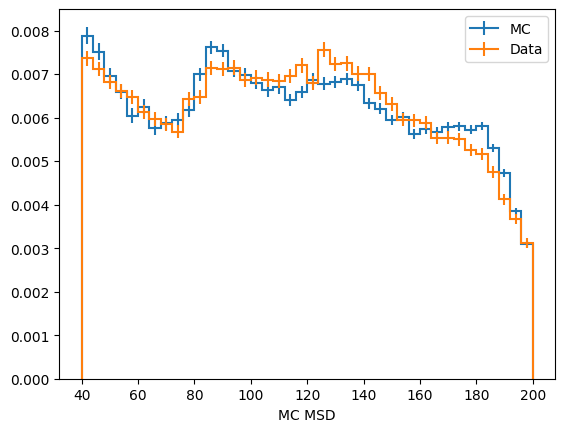

In [285]:
mc_hist.plot1d(label='MC', density=True)
data_hist.plot1d(label='Data', density=True)
plt.legend()
plt.show()

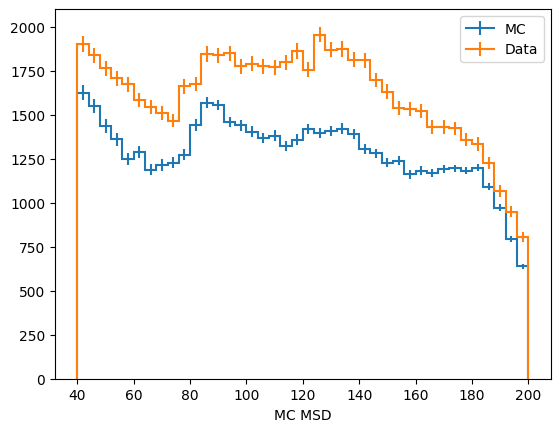

In [286]:
mc_hist.plot1d(label='MC', density=False)
data_hist.plot1d(label='Data', density=False)
plt.legend()
plt.show()

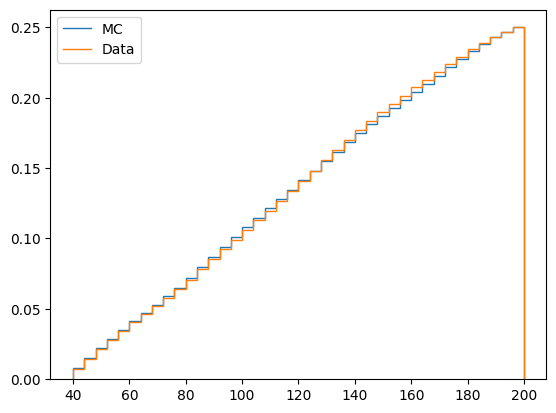

In [287]:
fig, ax = plt.subplots()

ax.stairs(np.cumsum(mc_hist.density()), edges=mc_hist.axes[0].edges, label='MC');
ax.stairs(np.cumsum(data_hist.density()), edges=data_hist.axes[0].edges, label='Data');
plt.legend()

In [288]:
-math.log10(abs(np.cumsum(mc_hist.density() * 4) - np.cumsum(data_hist.density() * 4)).max())

1.9053075535050457

In [196]:
np.cumsum(mc_hist.density()*4)

array([0.0316184 , 0.06271847, 0.09215764, 0.12034148, 0.14559813,
       0.17254465, 0.19738997, 0.22192102, 0.24746841, 0.27336336,
       0.30137739, 0.33104621, 0.36032617, 0.38821834, 0.41641011,
       0.4441885 , 0.47162807, 0.49847603, 0.52526982, 0.55156091,
       0.57917079, 0.60636895, 0.63304381, 0.66042725, 0.68624339,
       0.71128069, 0.73627126, 0.76001225, 0.78320567, 0.80552629,
       0.82823928, 0.85052147, 0.87256273, 0.8943802 , 0.91626009,
       0.93730844, 0.95639656, 0.97367699, 0.98845062, 1.        ])

In [83]:
variable = '1e2^1.0'

In [84]:
a = ak.flatten(data_arr.ECFs[variable])
print(len(a))
a = a[a > 0]
print(len(a))

64663
64616


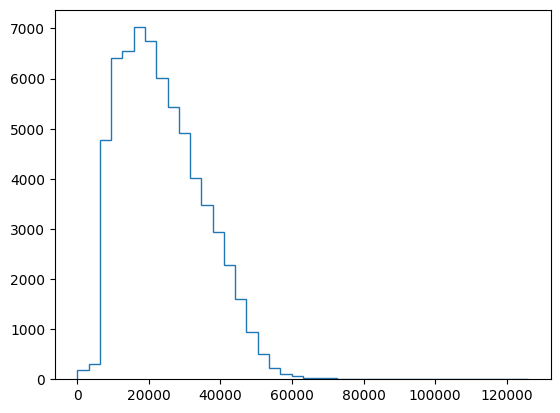

In [103]:
plt.hist(ak.flatten(data_arr.ECFs[variable]), bins=40, histtype='step')
# plt.hist(np.log(a), bins=100, histtype='step', log=False)
plt.show()

In [153]:
mini = math.floor(ak.min(data_arr.ECFs[variable]))
maxi = math.ceil(ak.max(data_arr.ECFs[variable]))
# mini = math.floor(ak.min(np.log(a)))
# maxi = math.ceil(ak.max(np.log(a)))
# mini = 0
# maxi = 1000
bins = np.arange(mini, maxi)

In [170]:
len(bins)/44

2865.0

In [171]:
def var_hist(dataset, variable, log=False):
    dataset = ak.flatten(dataset.ECFs[variable])
    if log == True:
        dataset = dataset + 1e-50
        dataset = np.log(dataset)
    make_hist = hist.Hist.new.Reg(44, mini, maxi, name='var', label='MC Var').Weight()
    make_hist.fill(var=dataset)
    return make_hist

In [172]:
ecf_hists = {}
for i in mc:
    if type(mc[i]) == dict:
        ecf_hists[i] = {}
        for j in mc[i]:
            ecf_hists[i][j] = var_hist(mc[i][j], variable, log=False)
    else:
        ecf_hists[i] = var_hist(mc[i], variable, log=False)

In [173]:
dataset = ak.flatten(data_arr.ECFs[variable])
# dataset = dataset + 1e-50
# dataset = np.log(dataset)
data_ecf_hist = hist.Hist.new.Reg(44, mini, maxi, name='var', label='Data Var').Weight()
data_ecf_hist.fill(var=dataset);

In [174]:
maxi

126060

In [175]:
scaleHgg = ((IL*(xsecs['hgg']*1000)*0.0817)/(totals['hgg']))
ecf_hists['hgg'].view(flow=True)[:] *= scaleHgg

scaleHbb = ((IL*(xsecs['hbb']*1000)*0.581)/(totals['hbb']))
ecf_hists['hbb'].view(flow=True)[:] *= scaleHbb

In [176]:
for i in mc:
    if (i == 'hgg') or (i == 'hbb'):
        continue
    else:
        if type(mc[i]) == dict:
            for j in mc[i]:
                scale = ((IL*(xsecs[i][j]*1000))/(totals_x[i][j]))
                ecf_hists[i][j].view(flow=True)[:] *= scale
        else:
            scale = ((IL*(xsecs[i]*1000))/(totals_x[i]))
            ecf_hists[i].view(flow=True)[:] *= scale

In [177]:
qcd_hist = sum(ecf_hists['qcd'][i] for i in ecf_hists['qcd'])
wqq_hist = sum(ecf_hists['wqq'][i] for i in ecf_hists['wqq'])
zqq_hist = sum(ecf_hists['zqq'][i] for i in ecf_hists['zqq'])
ttboosted_hist = sum(ecf_hists['ttboosted'][i] for i in ecf_hists['ttboosted'])

In [178]:
single_hists = {}
single_hists['qcd'] = qcd_hist
single_hists['wqq'] = wqq_hist
single_hists['zqq'] = zqq_hist
single_hists['ttboosted'] = ttboosted_hist
single_hists['hgg'] = ecf_hists['hgg']
single_hists['hbb'] = ecf_hists['hbb']
single_hists['ww'] = ecf_hists['ww']
single_hists['zz'] = ecf_hists['zz']
single_hists['wz'] = ecf_hists['wz']
single_hists['singletop'] = ecf_hists['singletop']

mc_ecf_hist = sum(single_hists[i] for i in single_hists)

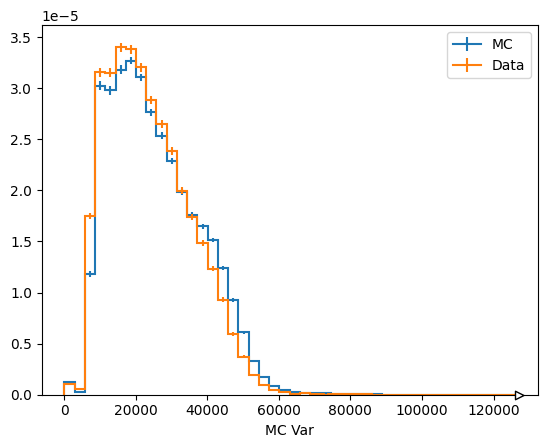

In [180]:
mc_ecf_hist.plot1d(label='MC', density=True)
data_ecf_hist.plot1d(label='Data', density=True)
plt.legend()
plt.show()

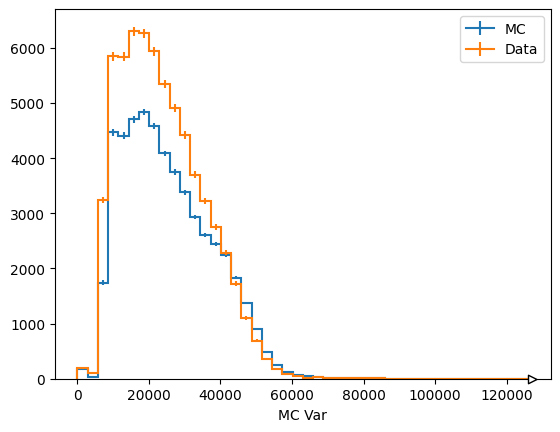

In [181]:
mc_ecf_hist.plot1d(label='MC', density=False)
data_ecf_hist.plot1d(label='Data', density=False)
plt.legend()
plt.show()

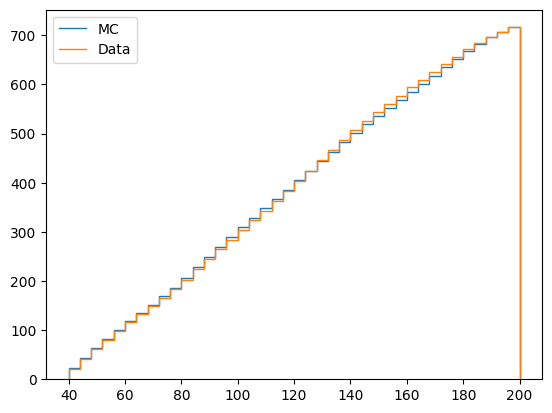

In [183]:
fig, ax = plt.subplots()

ax.stairs(np.cumsum(mc_hist.density()*2865), edges=mc_hist.axes[0].edges, label='MC');
ax.stairs(np.cumsum(data_hist.density()*2865), edges=data_hist.axes[0].edges, label='Data');
plt.legend()

In [184]:
-math.log10(abs(np.cumsum(data_ecf_hist.density()*2865) - np.cumsum(mc_ecf_hist.density()*2865)).max())

1.325015311060301

In [186]:
np.cumsum(data_ecf_hist.density()*2865)

array([0.00289192, 0.00436107, 0.05452887, 0.14492059, 0.23526592,
       0.33274052, 0.42959652, 0.52138008, 0.60393115, 0.67987876,
       0.74818675, 0.80545289, 0.85537324, 0.89794782, 0.93333127,
       0.95999258, 0.9771121 , 0.98779828, 0.99324188, 0.99607194,
       0.99740191, 0.99828341, 0.9985927 , 0.99901025, 0.99930408,
       0.9994742 , 0.99956699, 0.9996907 , 0.99978349, 0.99987628,
       0.99992268, 0.99995361, 0.99996907, 0.99996907, 0.99996907,
       0.99996907, 0.99996907, 0.99998454, 0.99998454, 0.99998454,
       0.99998454, 0.99998454, 0.99998454, 1.        ])

In [134]:
np.cumsum(data_hist.density())

array([0.00735738, 0.01446732, 0.02128729, 0.02789076, 0.03435891,
       0.0404791 , 0.04644851, 0.05229034, 0.05796592, 0.06439154,
       0.07086355, 0.07800056, 0.0851105 , 0.0922591 , 0.09912547,
       0.1060421 , 0.11291233, 0.1197555 , 0.12670693, 0.13390579,
       0.14069097, 0.14825325, 0.15548304, 0.1627283 , 0.16973772,
       0.1767394 , 0.18330421, 0.18961384, 0.19556392, 0.20149854,
       0.20737903, 0.21290769, 0.21844409, 0.22394569, 0.22919985,
       0.23435736, 0.23910119, 0.24322255, 0.24688771, 0.25      ])

In [188]:
maxi

126060